In [2]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 139 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638850 sha256=eee9962f774d8a15b12a1ec18da3bdc866bfffc75a244af289773ba076a2db69
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [1]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)
from fbprophet import Prophet
import matplotlib.pyplot as plt

Prophet 0.7.1


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('train_IxoE5JN.csv')
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [4]:
df['datetime']=pd.to_datetime(df['datetime'])

In [5]:
df.columns

Index(['row_id', 'datetime', 'energy'], dtype='object')

In [6]:
df1=df[['datetime','energy']]
df1.head()

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


In [7]:
df1.columns='ds','y'

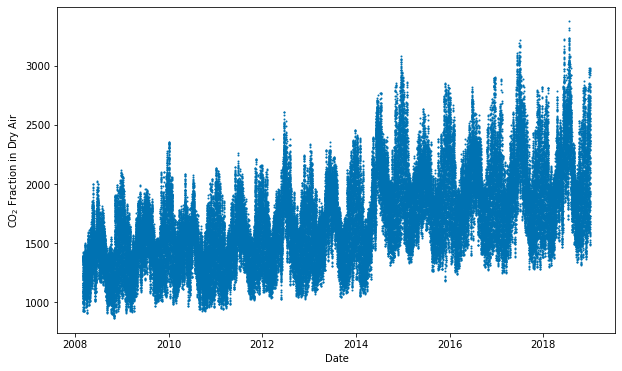

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df1['ds']), df1['y'], s=1, c='#0072B2')
plt.xlabel('Date')
plt.ylabel(r'CO$_2$ Fraction in Dry Air')
plt.show()

# Missing Value Analysis


In [9]:
df1.isnull().sum()

ds       0
y     1900
dtype: int64

# 2% data is missing 


In [10]:
1900/len(df1)*100

2.0001684352366516

In [11]:
df1['y'].fillna( method ='ffill', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
df1.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
model= Prophet()
model.fit(df1)

In [15]:
test_data=pd.read_csv('test_WudNWDM.csv')
test_data['datetime']=pd.to_datetime(test_data['datetime'])

In [16]:
test_data.columns

Index(['row_id', 'datetime'], dtype='object')

In [17]:
test_data.columns='row_id', 'ds'

In [18]:
test_data.columns

Index(['row_id', 'ds'], dtype='object')

In [19]:
type(test_data['ds'].to_frame())

pandas.core.frame.DataFrame

In [ ]:

pred=model.predict(test_data['ds'].to_frame())

In [ ]:
len(pred)

In [ ]:
len(test_data['row_id'])

In [ ]:
data={'row_id':list(test_data['row_id']),'energy':list(pred['yhat'])}
test_submission=pd.DataFrame(data)
test_submission

In [ ]:
test_submission.head()

In [ ]:
test_submission.to_csv('Submission_v1.csv',index=False)

In [103]:
model2= Prophet(changepoint_range=0.9)
model2.fit(df1)

In [104]:

pred=model2.predict(test_data['ds'].to_frame())

In [105]:
pred2=model2.predict(test_data['ds'].to_frame())
data2={'row_id':list(test_data['row_id']),'energy':list(pred2['yhat'])}
test_submission2=pd.DataFrame(data2)
test_submission2.to_csv('Submission_v2.csv',index=False)

# v3

In [20]:
model3= Prophet(changepoint_range=0.9,seasonality_mode='multiplicative')
model3.fit(df1)

In [23]:

pred3=model3.predict(test_data['ds'].to_frame())
data3={'row_id':list(test_data['row_id']),'energy':list(pred3['yhat'])}
test_submission3=pd.DataFrame(data3)
test_submission3.to_csv('Submission_v3.csv',index=False)

#V4

In [25]:
model4= Prophet(changepoint_range=0.9)
model4.fit(df1)

In [26]:

pred4=model4.predict(test_data['ds'].to_frame())
data4={'row_id':list(test_data['row_id']),'energy':list(pred['yhat'])}
test_submission4=pd.DataFrame(data4)
test_submission4.to_csv('Submission_v4.csv',index=False)

#V5

In [13]:
model5= Prophet( n_changepoints=5,changepoint_range=0.9)
model5.fit(df1)

In [21]:

pred5=model5.predict(test_data['ds'].to_frame())
data5={'row_id':list(test_data['row_id']),'energy':list(pred5['yhat'])}
test_submission5=pd.DataFrame(data5)
test_submission5.to_csv('Submission_v5.csv',index=False)

v6

In [23]:
model6= Prophet(changepoint_range=0.9,daily_seasonality=True)
model6.fit(df1)

pred6=model6.predict(test_data['ds'].to_frame())
data6={'row_id':list(test_data['row_id']),'energy':list(pred6['yhat'])}
test_submission6=pd.DataFrame(data6)
test_submission6.to_csv('Submission_v6.csv',index=False)